## Data Structure



### Combine the tar files

After downloading the files from onedrive one can combine them using 

cat hr5_metal.a* | tar xzvf -


### cluster particle data

The data of the Horizon run 5 simulation for our study has been split into various "clusters{snap}.hdf5" files where {snap} indicates the snapshot number of simulation. For example, the last snapshot at redshift of 0.625 is 296 for which the file name would be clusters296.hdf5. 

### cluster merger files

These are *_MAH.csv files containing the snapshot number and cluster id of the cluster at that snapshot.
It contains 8 columns, the following are of interest for the study: 

- time: Lookback time in Gyr
- snap: snapshot number of simulation
- HostHaloID: HostHaloID of the cluster at that snapshot
- ClusMass(Msun): Mass of the cluster at that epoch in solar mass.
- Massfraction: fraction of the final mass at that epoch


## Data containers 

The <a>params.ini</a> sets the paths. Set the path of <b>outdir</b> to the location of hdf5 files.

You can make the use of HR5_module.py to make the analysis. It contains the functions and classes used to perform the analysis.
In the following we will see the functions available for analysis.

In [1]:
# import the modules
import HR5_cluster as hr5
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

0.684


In [2]:
# Get all the IDs of clusters present at the given snapshot
snapshot=296

# Let s define the instance of the class Cluster with the snapshot
clus296 = pd.read_csv('../Data/groups5e13.csv')

clus296.columns

Index(['HostHaloID', 'HostMtot(Msun)'], dtype='object')

In [3]:
# These are the list IDs of the clusters
cluslist = clus296['HostHaloID'].tolist()
print(cluslist)
# Lets pick 10th cluster in the list
clusid = cluslist[10]


[1561636, 1581385, 1664541, 1758257, 1808858, 1827559, 1847383, 1954735, 1983863, 2002628, 2013898, 2071135, 2199507, 2227715, 2246014, 2290169, 2290206, 2507502, 2592446, 2623756, 2734822, 2885792, 2892837, 2937863, 2944981, 3016893, 3069850, 3094112, 3178107, 3200641, 3226680, 3259117, 3284456, 3355500, 3359016, 3540174, 3651767, 3672299, 3689051, 3700933, 3744183, 3748260, 3780410, 3811219, 3882383, 3889787, 3929760, 3929767, 3929805, 3933724, 3945090, 4040811, 4063505, 4068321, 4081915, 4083100, 4147752, 4195553, 4226110, 4289749, 4309863, 4328263, 4415004, 4465008, 4465020, 4477204, 4481843, 4481851, 4549606, 4560890, 4617549, 4622511, 4658833, 4658856, 4714730, 4827650, 4838809, 4899516, 4901245, 4921745, 4966761, 4968706, 5011121, 5028157, 5033760, 5044774, 5049205, 5208836, 5259095, 5265012, 5332403, 5358495, 5375604, 5409575, 5462023, 5493185, 5520106, 5548455, 5573913, 5634590, 5638753, 5699819, 5715147, 5753402, 5816171, 5871163, 5884858, 5957816, 5960768, 5979633, 6143068, 

In [4]:
# Initialize the class instance with the given `snapno` and `clusno`
# The instance will contain all the information of the cluster and functions for further # processing
clus = hr5.Cluster(snapshot,clusid)


In [5]:
# list all the functions and variables for the clus instance by dir(clus)
# the items with  __  are private and can t be accessed, others are public
# we get only public attributes

# Get the list of all attributes and functions of the clus object
all_attributes = dir(clus)

# Filter the list to only include public attributes and functions
public_attributes = [attr for attr in all_attributes if not attr.startswith( '_' )]

# Print the resulting list of public attributes and functions
print(public_attributes)


['bcgid', 'clusID', 'clus_mdm', 'clus_mgas', 'clus_msink', 'clus_mstar', 'clus_mtot', 'clus_nsink', 'clus_nstar', 'clus_nsub', 'clus_pos', 'clus_vel', 'f', 'get_all_parts', 'get_alldat_gal', 'get_galids', 'save_yt_dataset', 'snap']


Attributes are the functions and variables that can be accessed using clus.{attribute_name} where {attribute_name} is the 
name of the attribute. We explain all the varible and functions:

- bcgid: galaxy id of the most massive galaxy
- clusID: cluster id at the snapshot
- clus_mdm: total dark matter mass of the cluster
- clus_mgas: total gas mass of the cluster
- clus_msink: total sink particle mass of cluster 
- clus_mstar: total stellar mass of cluster
- clus_mtot: total mass of the cluster
- clus_ngas: total number of gas particles in cluster 
- clus_nsink: total number of sink particles in cluster
- clus_nstar: total number of star particles in cluster
- clus_nsub: total number of subhalos (galaxies) cluster
- clus_pos: position of cluster in cMpc/h in the simulation
- clus_vel: velocity of the cluster in km/s 
- f: excess to the raw hdf5 file
- get_all_parts: function to get all particles of a type in cluster
- get_alldat_gal: get all data for a galaxy
- get_galids: get all galaxy ids in a cluster
- save_yt_dataset: get yt dataset for a cluster
- snap: snapshot number 

In [6]:
# You can also get explaination of the attributes and functions using ? or ??
clus.get_galids?


Signature: clus.get_galids()
Docstring:
Returns a list of galaxy IDs from the `self.f` dictionary that corresponds to the cluster with ID `self.clusID`.

:return: A list of galaxy IDs.
File:      ~/hr5_metallicity/Code/HR5_cluster.py
Type:      method


In [6]:
# Get all ids galaxies in the cluster

gal_list = clus.get_galids()

# print first 10
print(gal_list[:10])



['2087002', '2087003', '2087004', '2087005', '2087006', '2087007', '2087008', '2087009', '2087010', '2087011']


In [8]:
# get all particles of type 'star' in the cluster we can use get_all_parts

clus.get_all_parts?

Signature: clus.get_all_parts(partype)
Docstring:
This function returns an instance of the Galaxy class containing all parts of the specified type.

Args:
    partype (str): The type of part to retrieve.

Returns:
    Galaxy: An instance of the Galaxy class containing all parts of the specified type.
File:      ~/hr5_metallicity/Code/HR5_cluster.py
Type:      method


In [7]:
# get all stellar particles it returns a Galaxy object but this only contains
# the sttributes for stellar particles and others are empty

stars = clus.get_all_parts('star')

Processing galaxy ICL7132

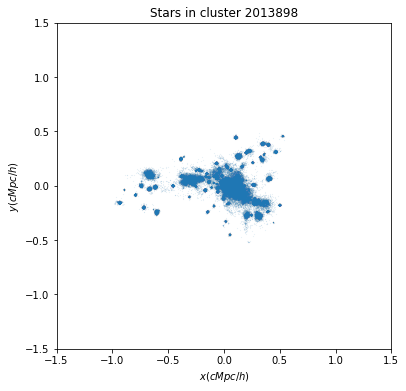

In [8]:
# We can plot these stars

star_pos = stars.star_pos_com

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlabel(r'$x(cMpc/h)$')
ax.set_ylabel(r'$y(cMpc/h)$')
ax.scatter(star_pos[:,0],star_pos[:,1],s=0.001)
ax.set_title(f"Stars in cluster {clusid}")
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)

plt.show()

In [11]:
# we can use function get_allgal_data to get all the data of the galaxies in the cluster
# let's see the inputs

clus.get_alldat_gal?

Signature: clus.get_alldat_gal(galist)
Docstring:
This function takes in a list of galaxy IDs or a single galaxy ID and returns a Galaxy object or a list of Galaxy objects respectively. 

Args:
- galist (list or int): A list of galaxy IDs or a single galaxy ID.

Returns:
- outgal (list): A list of Galaxy objects if galist is a list.
- gal (Galaxy object): A Galaxy object if galist is an int.
File:      ~/hr5_metallicity/Code/HR5_cluster.py
Type:      method


In [9]:
# Lets choose galaxy no 1 from the gal_list and run the function

galid = gal_list[0]

gal = clus.get_alldat_gal(galid)

Processing galaxy 2087002

In [10]:
# gal is a Galaxy object that has it's own attributes
# lets see the attributes

# Get the list of all attributes and functions of the gal object
all_attributes = dir(gal)

# Filter the list to only include public attributes and functions
public_attributes = [attr for attr in all_attributes if not attr.startswith( '_' )]

# Print the resulting list of public attributes and functions
print(public_attributes)

['bcgid', 'clusID', 'clus_mdm', 'clus_mgas', 'clus_msink', 'clus_mstar', 'clus_mtot', 'clus_nsink', 'clus_nstar', 'clus_nsub', 'clus_pos', 'clus_vel', 'dm_mass', 'dm_pos', 'dm_pos_com', 'dm_vel', 'f', 'galID', 'gal_mdm', 'gal_mgas', 'gal_msink', 'gal_mstar', 'gal_mtot', 'gal_ngas', 'gal_nsink', 'gal_nstar', 'gal_pos', 'gal_vel', 'gas_fe', 'gas_h', 'gas_mass', 'gas_o', 'gas_pos', 'gas_pos_com', 'gas_t', 'gas_vel', 'gas_z', 'get_all_parts', 'get_alldat_gal', 'get_galids', 'rcom_dm', 'rcom_gas', 'rcom_star', 'save_yt_dataset', 'snap', 'star_mass', 'star_pos', 'star_pos_com', 'star_vel', 'star_z']


Galaxy object takes it's inheritense from the Cluster class therefore contains all the parameters available for Class 
are available plus extra few. We explain them below:
**Note all masses are in Msun/h and positions are in cMpc/h**

- dm_mass: array of dark matter mass : size (gal_ndm)
- dm_pos: array of dark matter position size: (gal_ndm,3)
- dm_pos_com: array of dark matter position in center of mass size: (gal_ndm,3)
- dm_vel: array of dark matter velocity size: (gal_ndm,3)
- galID: galaxy ID
- gal_mdm: total dark matter mass of galaxy
- gal_mgas: total gas mass of galaxy
- gal_msink: total sink mass of galaxy
- gal_mstar: total stellar mass of galaxy
- gal_mtot: total mass of galaxy
- gal_ngas: total number of gas particles in galaxy
- gal_nsink: total number of sink particles in galaxy
- gal_nstar: total number of stellar particles in galaxy
- gal_pos: galaxy position (cMpc/h) size: 3
- gal_vel: array of gas particle velocity size: 3
- gas_fe: array of fe size: (gal_ngas)
- gas_h: array of h size: (gal_ngas)
- gas_mass: array of gas particle mass : size (gal_gas)
- gas_o: array of o size: (gal_ngas)
- gas_pos: array of gas particle position (cMpc/h) size: (gal_ngas,3)
- gas_pos_com: array of gas particle position in center of mass (cMpc/h) size: (gal_ngas,3)
- gas_t: array of gas temperature size: (gal_ngas)
- gas_vel: array of gas particle velocity size: (gal_ngas,3)
- gas_z: array of gas metallicity size: (gal_ngas)
- rcom_dm: array of dark matter particle distances (cMpc/h) from origin in COM frame: (gal_ndm)
- rcom_gas: array of gas particle distances (cMpc/h) from origin in COM frame: (gal_ngas)
- rcom_star: array of stellar particle distances from origin in COM frame (cMpc/h): (gal_nstar)
- star_mass: array of stellar particle mass: (gal_nstar)
- star_pos: array of stellar particle position (cMpc/h) size: (gal_nstar,3)
- star_pos_com: array of stellar particle position in COM frame (cMpc/h) size: (gal_nstar,3)
- star_vel: array of stellar particle velocity size: (gal_nstar,3)
- star_z: array of stellar particle metallicty size: (gal_nstar)


In [11]:
# You can also choose a list of galaxies and run the function
# lets choose first 5 galaxies from gal_list
galxs = gal_list[:5]

galout = clus.get_alldat_gal(galxs)

Processing galaxy 2087006

In [12]:
# galout now contains the list of galaxy object which contains the
# the all the attributes above

galout

In [13]:
# To get for example the position of dark matter in COM frame
# for galaxy 2087002 (gal) defined above this is a array of size (ndm,3)
dmcom = gal.dm_pos_com

print(dmcom.shape)

(144, 3)


Processing galaxy 2087008

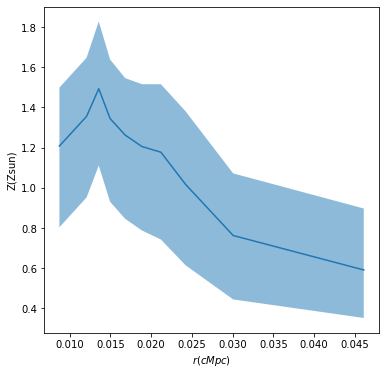

In [14]:
# We can also make simple profile plots of stellar metallicity 
# For example for BCG galaxy of this cluster we show below


def Binned_histogram(data,propx,propy,nb):
    """
    This function returns the binned median and quartiles of the data
    """

    ser, bins = pd.qcut(data[propx],nb,retbins=True, labels=False,duplicates='drop')
    labels = [int(i) for i in range(len(bins)-1)]
    data['binned'] = pd.cut(data[propx], bins,labels=labels,duplicates='drop')

    Q1 = []
    Q2 = []
    qua1 = []
    qua2 = []

    j=0
    for lab in labels:
        
        Q1.append(data.loc[data['binned']==lab,propx].median())
        Q2.append(data.loc[data['binned']==lab,propy].median())    

        # first and third quartile
        qua1.append(data.loc[data['binned']==lab,propy].quantile(0.25))
        qua2.append(data.loc[data['binned']==lab,propy].quantile(0.75))

        
    return Q1,Q2,qua1,qua2

# get the poisiton in COM frame of BCG galaxy
bcg_galaxy = clus.get_alldat_gal(clus.bcgid)
star_pos_gal = bcg_galaxy.star_pos-bcg_galaxy.gal_pos
rgal_star = np.linalg.norm(star_pos_gal,axis=1)

# Create a dataframe of pandas for analysis
BCG_data = pd.DataFrame({'rcom':rgal_star,'star_z':bcg_galaxy.star_z[:]/0.02})


q1,q2,Q1,Q2 = Binned_histogram(BCG_data,'rcom','star_z',10)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlabel(r'$r(cMpc)$')
ax.set_ylabel(r'Z(Zsun)')
ax.plot(q1,q2)
ax.fill_between(q1,Q1,Q2,alpha=0.5)


In [15]:
bcg_galaxy.gal_pos

array([ 50.86337697, 229.09192441, 251.21765956])

## YT dataset

The Module also allows us to get the data for the cluster in the <b>YT package</b> dataset.
[YT Project](https://yt-project.org/) is used for analysis of simulations and has a variety of functions that are readily available. The dataset is saved as generic particle dataset.


In [19]:
clus.save_yt_dataset?

Signature: clus.save_yt_dataset(clusID)
Docstring:
Saves the yt dataset of the BCG, ICM, and rest of the galaxies.

Parameters:
-----------
clusID: int
    Unique identifier of the cluster.


Returns:
--------
ds_all: yt dataset
    Dataset containing all the particles.
ds_rest: yt dataset
    Dataset containing the rest of the galaxies particles.
ds_bcg: yt dataset
    Dataset containing the BCG particles.
ds_icm: yt dataset
    Dataset containing the ICM particles.
File:      ~/hr5_metallicity/Code/HR5_cluster.py
Type:      method


In [13]:
cluster=2507502
snapshot=296

clus = hr5.Cluster(snapshot,cluster)



#ds_all,ds_rest,ds_bcg,ds_icm = clus.save_yt_dataset(snapshot)
ids = clus.get_galids()
ids.remove('ICL')
gal = clus.get_alldat_gal(ids)



Processing galaxy 2603986

In [14]:
gal[-1].star_pos_com

array([[-0.69582097,  0.37055932,  1.41986631],
       [-0.6975444 ,  0.37476393,  1.4242614 ],
       [-0.70185631,  0.37964938,  1.41949682],
       [-0.70231633,  0.37306925,  1.42054743],
       [-0.70273702,  0.36723041,  1.42707432],
       [-0.70284388,  0.37901124,  1.41732178],
       [-0.70572338,  0.3709308 ,  1.41190981],
       [-0.70611722,  0.37719341,  1.42647499],
       [-0.70626682,  0.37495183,  1.4217044 ],
       [-0.70633443,  0.37892844,  1.42456309],
       [-0.70636898,  0.36787362,  1.41369072],
       [-0.70705305,  0.37967061,  1.41937577],
       [-0.70716802,  0.37962104,  1.41942662],
       [-0.70720233,  0.3667265 ,  1.42184514],
       [-0.707633  ,  0.36886614,  1.42131893],
       [-0.70780428,  0.37330725,  1.42439897],
       [-0.70796786,  0.37438967,  1.42133747],
       [-0.70822409,  0.36738987,  1.42441334],
       [-0.70839936,  0.37258407,  1.4218047 ],
       [-0.70842636,  0.37480182,  1.42615603],
       [-0.70858617,  0.37412279,  1.421

In [21]:
# We can now use these dataset for analysis of all galaxies, central galaxies and ICM
# These dataset contain all the information as fields of diffent particles
# Check all the fields of ds_all

ds_all.field_list

[('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('dm', 'particle_mass'),
 ('dm', 'particle_position_x'),
 ('dm', 'particle_position_y'),
 ('dm', 'particle_position_z'),
 ('gas', 'fe'),
 ('gas', 'h'),
 ('gas', 'o'),
 ('gas', 'particle_mass'),
 ('gas', 'particle_position_x'),
 ('gas', 'particle_position_y'),
 ('gas', 'particle_position_z'),
 ('gas', 't'),
 ('gas', 'z'),
 ('star', 'particle_mass'),
 ('star', 'particle_position_x'),
 ('star', 'particle_position_y'),
 ('star', 'particle_position_z'),
 ('star', 'z')]

In [22]:
yt.load_particles??

Object `yt.load_particles` not found.


In [23]:
# there are also extra fields in ds_all that yt generates for us

ds_all.derived_field_list

[('all', 'mesh_id'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_radius'),
 ('all', 'particle_spherical_position_phi'),
 ('all', 'particle_spherical_position_radius'),
 ('all', 'particle_spherical_position_theta'),
 ('all', 'relative_particle_position'),
 ('all', 'relative_particle_position_x'),
 ('all', 'relative_particle_position_y'),
 ('all', 'relative_particle_position_z'),
 ('deposit

Full details of all the capabilities of yt are given here [plotting with yt](https://yt-project.org/doc/visualizing/plots.html)

Just to do a demonstration we plot a projection plot of stellar paticle mass



yt : [INFO     ] 2023-06-21 15:02:40,840 xlim = -1.800000 1.800000
yt : [INFO     ] 2023-06-21 15:02:40,841 ylim = -1.800000 1.800000
yt : [INFO     ] 2023-06-21 15:02:40,844 xlim = -1.800000 1.800000
yt : [INFO     ] 2023-06-21 15:02:40,845 ylim = -1.800000 1.800000
yt : [INFO     ] 2023-06-21 15:02:40,847 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh
/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:841: Matplotli


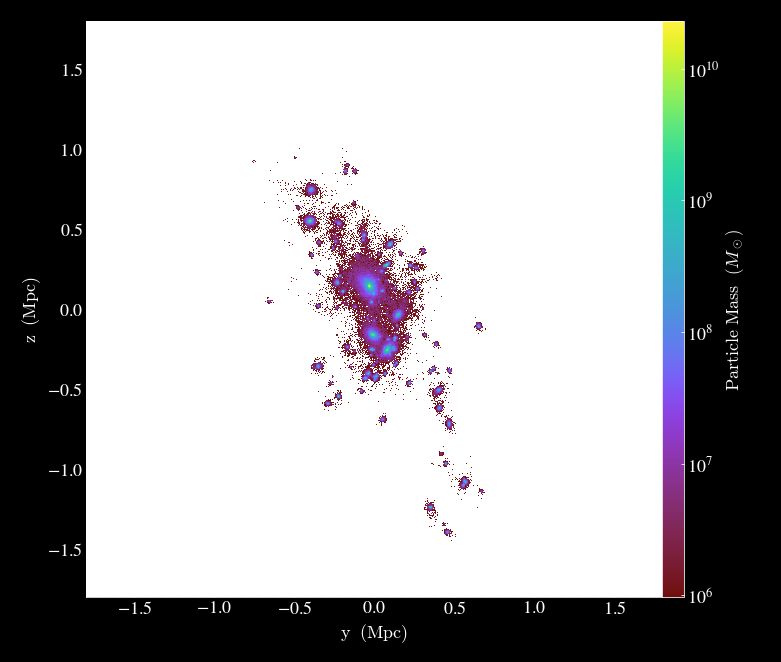

In [24]:
import yt 

prj = yt.ParticleProjectionPlot(ds_all,'x',("star","particle_mass"))

prj.set_unit(("star","particle_mass"), "Msun")
                

## Time Evolution

To trace the time evolution of the cluster we track the host halo of BCG with redshift.
These values are written in the _MAH.txt files.


In [25]:
# Let analise the cluster id no. 2013898 shown above
import configparser
# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')


outdir = parser.get('Paths','outdir')

clus_evo = pd.read_csv(f'{outdir}/{clusid}_MAH.csv')

clus_evo.columns

Index(['time', 'snap', 'host_flag', 'flag_prog', 'HostHaloID', 'MainGalID',
       'ClusMass(Msun)', 'Massfraction'],
      dtype='object')

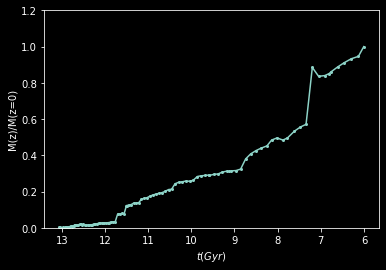

In [26]:
# plot the mass accretion history

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'$t(Gyr)$')
ax.set_ylabel(r'M(z)/M(z=0)') 
ax.plot(clus_evo['time'],clus_evo['Massfraction'],marker='o',markersize=2)
ax.set_ylim(0,1.2)
ax.invert_xaxis()
plt.show()


Processing galaxy 2128832

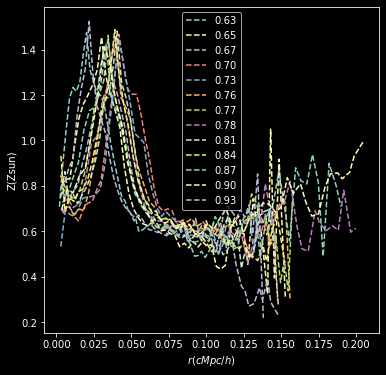

In [27]:

def Binned_histogram(data,propx,propy,nb):
    """
    This function returns the binned median and quartiles of the data
    """

    ser, bins = pd.cut(data[propx],nb,retbins=True, labels=False,duplicates='drop')
    labels = [int(i) for i in range(len(bins)-1)]
    data['binned'] = pd.cut(data[propx], bins,labels=labels,duplicates='drop')

    Q1 = []
    Q2 = []
    qua1 = []
    qua2 = []

    j=0
    for lab in labels:
        
        Q1.append(data.loc[data['binned']==lab,propx].median())
        Q2.append(data.loc[data['binned']==lab,propy].median())    

        # first and third quartile
        qua1.append(data.loc[data['binned']==lab,propy].quantile(0.25))
        qua2.append(data.loc[data['binned']==lab,propy].quantile(0.75))

        
    return Q1,Q2,qua1,qua2


fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlabel(r'$r(cMpc/h)$')
ax.set_ylabel(r'Z(Zsun)')


clus_last =  2013898

clus_half = pd.read_csv(f'{outdir}/halfmass.csv')
Timedat = pd.read_csv('../Data/Time_data.csv')

Red = clus_half.loc[clus_half['HostHaloID']==clus_last,'Redshift'].values[0]
half_snap = Timedat.loc[Timedat['Redshift']==Red,'Snapshot'].values[0]
MAHfile = pd.read_csv(f"{outdir}/{clus_last}_MAH.csv")
beyond_half = MAHfile[MAHfile['snap']>half_snap]
for snap,clusid in zip(beyond_half['snap'].values,beyond_half['HostHaloID'].values):

    red = Timedat.loc[Timedat['Snapshot']==snap,'Redshift'].values[0]

    clus = hr5.Cluster(snap,clusid)
    # get the poisiton in COM frame of BCG galaxy
    bcg_galaxy = clus.get_alldat_gal(clus.bcgid)
    star_pos_gal = bcg_galaxy.star_pos[:]-bcg_galaxy.gal_pos[:]
    rgal_star = np.linalg.norm(star_pos_gal,axis=1)

    # Create a dataframe of pandas for analysis
    BCG_data = pd.DataFrame({'rcom':rgal_star,'star_z':bcg_galaxy.star_z[:]/0.02})


    q1,q2,_,_ = Binned_histogram(BCG_data,'rcom','star_z',50)

    ax.plot(q1,q2,linestyle='--',label=f'{red:.2f}')

    

ax.legend()


In [28]:

import pandas as pd 
import configparser as par
import configparser
import HR5_cluster as hr5 
# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')

outdir = parser.get('Paths','outdir')

clus_last =  1808858

clus_half = pd.read_csv(f'{outdir}/halfmass.csv')
Timedat = pd.read_csv('../Data/Time_data.csv')

Red = clus_half.loc[clus_half['HostHaloID']==clus_last,'Redshift'].values[0]
half_snap = Timedat.loc[Timedat['Redshift']==Red,'Snapshot'].values[0]
MAHfile = pd.read_csv(f"{outdir}/{clus_last}_MAH.csv")
beyond_half = MAHfile[MAHfile['snap']>half_snap]
for snap,clusid in zip(beyond_half['snap'].values,beyond_half['HostHaloID'].values):

    red = Timedat.loc[Timedat['Snapshot']==snap,'Redshift'].values[0]

    clus = hr5.Cluster(snap,clusid)
    # get the poisiton in COM frame of BCG galaxy
    bcg_galaxy = clus.get_alldat_gal(clus.bcgid)
    print(f"\nGalaxy star {clus.clus_mtot:0.2e},clus stellar mass={clus.clus_mstar}, snap={clus.snap},clusid={clus.clusID},bcgmass={bcg_galaxy.gal_mstar:0.2e}")


Processing galaxy 1872188
Galaxy star 6.06e+13,clus stellar mass=853059031535.3143, snap=296,clusid=1808858,bcgmass=1.95e+11
Processing galaxy 7406273
Galaxy star 5.97e+13,clus stellar mass=846701471024.7664, snap=285,clusid=7072427,bcgmass=1.93e+11
Processing galaxy 7450161
Galaxy star 5.98e+13,clus stellar mass=846554239735.0752, snap=271,clusid=7114961,bcgmass=1.91e+11
Processing galaxy 7586252
Galaxy star 5.90e+13,clus stellar mass=836023105458.5535, snap=257,clusid=7243615,bcgmass=1.94e+11
Processing galaxy 7657001
Galaxy star 5.77e+13,clus stellar mass=826349710043.3263, snap=243,clusid=7375180,bcgmass=2.13e+11
Processing galaxy 7541136
Galaxy star 5.58e+13,clus stellar mass=813379863683.2156, snap=229,clusid=7197440,bcgmass=2.16e+11
Processing galaxy 7578757
Galaxy star 5.51e+13,clus stellar mass=804522816737.9558, snap=224,clusid=7234482,bcgmass=2.81e+11
Processing galaxy 7599971
Galaxy star 5.30e+13,clus stellar mass=774267638221.0132, snap=219,clusid=7253153,bcgmass=1.78e+11


In [7]:
import pandas as pd 
import configparser as par
import configparser
import HR5_cluster as hr5 
# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')

outdir = parser.get('Paths','outdir')

snap=185
clusid =  7407783
clus = hr5.Cluster(snap,clusid)


/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


0.684


In [30]:
galids = clus.get_galids()
for ga in galids:
    galtmp=clus.get_alldat_gal(ga)
    print(f"\n{ga} with stellar mass: {galtmp.gal_mstar:0.2e} and {galtmp.gal_mtot:0.2e}")
                    

Processing galaxy 7767490
7767490 with stellar mass: 3.49e+07 and 1.03e+10
Processing galaxy 7767491
7767491 with stellar mass: 3.43e+08 and 3.18e+10
Processing galaxy 7767492
7767492 with stellar mass: 9.69e+07 and 9.95e+09
Processing galaxy 7767493
7767493 with stellar mass: 2.93e+07 and 1.73e+09
Processing galaxy 7767494
7767494 with stellar mass: 1.44e+07 and 1.33e+09
Processing galaxy 7767495
7767495 with stellar mass: 1.95e+09 and 1.57e+10
Processing galaxy 7767496
7767496 with stellar mass: 2.18e+07 and 2.33e+10
Processing galaxy 7767497
7767497 with stellar mass: 1.45e+10 and 1.08e+11
Processing galaxy 7767498
7767498 with stellar mass: 1.49e+10 and 3.35e+11
Processing galaxy 7767499
7767499 with stellar mass: 8.49e+10 and 1.28e+13
Processing galaxy 7767500
7767500 with stellar mass: 1.61e+11 and 9.96e+12
Processing galaxy 7767501
7767501 with stellar mass: 5.24e+10 and 3.07e+12
Processing galaxy 7767502
7767502 with stellar mass: 1.56e+10 and 8.91e+10
Processing galaxy 7767503

In [8]:
clus.bcgid

'7767500'

In [9]:
snap85 = pd.read_parquet(f"/scratch/ankitsingh/Galaxy_catalogs/galaxy_catalogue_185.parquet")

In [11]:
clus1 = snap85.loc[snap85['HostHaloID']==7407783]

clus1['Mtot'] = clus1['Mstar(Msun)'] + clus1['Mgas(Msun)']+clus1['Mdm(Msun)']+clus1['Msmbh(Msun)']


/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
clus1.loc[clus1['ID']==7767500,'Mstar(Msun)']

958291    2.351523e+11
Name: Mstar(Msun), dtype: float64

In [14]:
import pandas as pd 
snap77 = pd.read_parquet(f"/scratch/ankitsingh/Galaxy_catalogs/galaxy_catalogue_177.parquet")

In [15]:
cluspro = snap77.loc[snap77['HostHaloID']==7057203]

cluspro['Mtot'] = cluspro['Mstar(Msun)'] + cluspro['Mgas(Msun)']+cluspro['Mdm(Msun)']+cluspro['Msmbh(Msun)']

/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
cluspro.loc[cluspro['ID']==7377517,'Mstar(Msun)']


891742    2.325336e+11
Name: Mstar(Msun), dtype: float64

In [17]:
# import the modules
import HR5_cluster as hr5
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 


clusid = 7057203
snapshot=177

clus = hr5.Cluster(snapshot,clusid)

clus.bcgid

'7377517'

In [19]:
gal = clus.get_alldat_gal(clus.bcgid)
print(f'\n {gal.gal_mstar:0.3e}')    

Processing galaxy 7377517
 2.325e+11


In [20]:

clusid = 7407783
snapshot=185

clus = hr5.Cluster(snapshot,clusid)

clus.bcgid

'7767500'

In [43]:
gal = clus.get_alldat_gal(clus.bcgid)
print(f'\n {gal.gal_mstar:0.3e}')    

Processing galaxy 7767500
 2.352e+11


In [45]:
gal.save_yt_dataset(7407783)


Processing galaxy ICL7577(2098109,) (2098109,)


yt : [INFO     ] 2023-07-18 18:20:21,696 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-07-18 18:20:21,697 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-07-18 18:20:21,698 Parameters: domain_left_edge          = [-2. -2. -2.]
yt : [INFO     ] 2023-07-18 18:20:21,699 Parameters: domain_right_edge         = [2. 2. 2.]
yt : [INFO     ] 2023-07-18 18:20:21,700 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2023-07-18 18:20:21,704 Allocating for 3.657e+06 particles (index particle type 'all')
yt : [INFO     ] 2023-07-18 18:20:22,575 Identified 2.559e+05 octs
yt : [INFO     ] 2023-07-18 18:20:22,995 xlim = -2.000000 2.000000
yt : [INFO     ] 2023-07-18 18:20:22,996 ylim = -2.000000 2.000000
yt : [INFO     ] 2023-07-18 18:20:22,998 xlim = -2.000000 2.000000
yt : [INFO     ] 2023-07-18 18:20:22,998 ylim = -2.000000 2.000000
yt : [INFO     ] 2023-07-18 18:20:23,000 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh


In [2]:
from astropy.io import fits

hdul = fits.open('/scratch/ankitsingh/Galaxy_catalogs/ICL_data/1808858/177_7057203.fits')

In [5]:
import astropy.units as u 
import numpy as np 

scale1 = hdul[0].header['Scale'].split(' ')[0]

width,res = float(scale1.split('/')[0]),float(scale1.split('/')[1])

# scale1 = (width/res)*(u.Mpc/u.pixel)

# pixel = hdul[1].data[~np.isnan(hdul[1].data)].shape[0]

# print(pixel)
bcg = hdul[1].data[~np.isnan(hdul[1].data)].sum()

# bcg = bcg.to(u.Msun/u.Mpc**2).sum()


print(f'BCG1 mass= {bcg:0.3e}')

BCG1 mass= 2.325e+11
